In [107]:
from fastdtw import fastdtw
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import csv
import pandas as pd
import torch
import os
from scipy.spatial.distance import euclidean

## Dynamic Time Warping with Nearest Neighbor

In [189]:
# Dynamic Time Warping w/ Nearest Neighbor
path1 = '../../../../../..'
path2 = '/media/ender/14e0ab7c-d55d-4385-943b-b08e2348dd52/natops/data/'
train_path = path1+path2+'train/'
test_path = path1+path2+'test/'
count = 0
correct = 0

def read_in_file(path):
    file_df = pd.read_csv(path)
    file_array = file_df.to_numpy()  
    file_array = np.nan_to_num(file_array)
    
    return file_array



# Loop through all files
for filename in os.listdir(test_path):
    #if filename[0:3] not in ['g01', 'g15', 'g18']: # only run on selected gestures
    #    continue
        
    test_array = read_in_file(test_path+filename)
    best_distance = -1

    # Find the closest time series
    for train_file_name in os.listdir(train_path):
        #if train_file_name[0:3] not in ['g01', 'g15', 'g18']: # only run on seleced gestures
        #    continue
        
        if filename == 'test.csv' or train_file_name == 'train.csv' or train_file_name == 'test.csv':
            continue
        
        train_array = read_in_file(train_path+train_file_name)
        if not train_array.any():
            continue
                    
        if len(test_array[1]) != len(train_array[1]):
            print(train_file_name)
            
        distance, path = fastdtw(test_array,train_array, dist=euclidean)

        if distance < best_distance or best_distance == -1:
            best_distance = distance
            prediction = train_file_name[0:3]

#     print('The predicted sign was %s and the actual sign was %s' % (prediction, filename[0:3]))

    #Test prediction
    if prediction == filename[0:3]:
        correct += 1
    count += 1
    

# Print accuracy
print(float(correct/count)) # 0.90833 on three gestures

0.5142857142857142


/home/ender/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/ender/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/ender/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


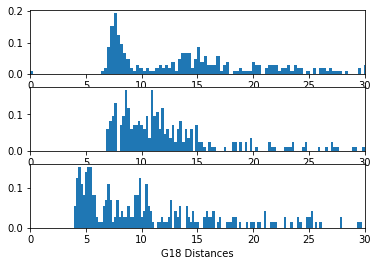

In [84]:
# Determine the threshold value on diistances

distances1 = []
distances2 = []
distances3 = []
test_sequence = ['g01', 'g15', 'g18']

for filename in os.listdir(test_path):
    if filename[0:3] != test_sequence[2]:
        continue
    
    test_array = read_in_file(test_path+filename)
    
    for train_file_name in os.listdir(train_path):
        if train_file_name[0:3] not in test_sequence:
            continue
            
        train_array = read_in_file(train_path+train_file_name)
        distance, path = fastdtw(test_array, train_array, dist=euclidean)
        
        if train_file_name[0:3] == test_sequence[0]:
            distances1.append(distance)
        if train_file_name[0:3] == test_sequence[1]:
            distances2.append(distance)
        if train_file_name[0:3] == test_sequence[2]:
            distances3.append(distance)
    break

plt.title('Test G01')
plt.subplot(3,1,1)
plt.hist(distances1,normed=True,bins=500)
plt.xlabel('G01 Distances')
plt.xlim([0, 30])

plt.subplot(3,1,2)
plt.hist(distances2,normed=True,bins=500)
plt.xlabel('G15 Distances')
plt.xlim([0, 30])

plt.subplot(3,1,3)
plt.hist(distances3,normed=True,bins=500)
plt.xlabel('G18 Distances')
plt.xlim([0, 30])


plt.show()

A max threshold of ~10 seems to be reasonable for seperating signs

## Load in Dataset

In [108]:
path1 = '../../../../../..'
path2 = '/media/ender/14e0ab7c-d55d-4385-943b-b08e2348dd52/natops/data/'
train_path = path1+path2+'train/'
test_path = path1+path2+'test/'
test_sequence = ['g01', 'g15', 'g18']

def read_in_file(path):
    file_df = pd.read_csv(path)
    file_array = file_df.to_numpy()  
    file_array = np.nan_to_num(file_array)
    
    #print(np.shape(file_array)[0]*np.shape(file_array)[1])
    #file_array = file_array.reshape((1,np.shape(file_array)[0]*np.shape(file_array)[1]))
    #print(np.shape(file_array))
    cols = np.shape(file_array)[1]
    row = np.shape(file_array)[0]
    
    if cols < 28:
        pad = np.zeros((row, 3108-cols))
        file_array = np.append(file_array, pad, axis=1)
    if row < 106:
        pad = np.zeros((106-row, 28))
        file_array = np.append(file_array, pad, axis=0)
    return file_array


def load_dataset(train_path):
    train_x = np.empty((0,106,28))
    train_y = np.empty((0,106,28))
    test_x = np.empty((0,3108))
    test_y = np.empty((0,1))
    cols_max = 0
    row_max = 50
    
    for filename in os.listdir(train_path):
        if filename[0:3] not in test_sequence:
            continue
         
        file_array = read_in_file(train_path+filename)
        
        print(np.shape(file_array))
        train_x = np.append(train_x, [[read_in_file(train_path+filename)]], axis=0)
        train_y = np.append(train_y, [[int(filename[1:3])]], axis=0)
        
    #train = np.append(train_y, train_x, axis=1)
    #np.savetxt('train.csv', train, delimiter=',')
    #np.savetxt(train_path+'test.csv', train,  delimiter=',')
    return file_array
print(train_x)
file_array = load_dataset(train_path)
print("DONE")
print(train_x)

NameError: name 'train_x' is not defined

In [109]:
path1 = '../../../../../..'
path2 = '/media/ender/14e0ab7c-d55d-4385-943b-b08e2348dd52/natops/data/'
train_path = path1+path2+'train/train.csv'
test_path = path1+path2+'test/test.csv'

device = torch.device('cuda:0')

print("Loading CSV ...")
train = pd.read_csv(train_path)
train_tensor = torch.tensor(train.values)

test = pd.read_csv(test_path)
test_tensor = torch.Tensor(test.values)

trainset = torch.utils.data.DataLoader(train_tensor, batch_size=32,shuffle=True)
testset = torch.utils.data.DataLoader(test_tensor, batch_size=32,shuffle=True)

print('Done')

Loading CSV ...
Done


In [3]:
for data in trainset:
    y = data[:,0]
    x = data[:,1:]
    print(x)
    print(y)
    break

tensor([[0.4954, 0.4946, 0.4352,  ..., 0.0000, 0.0000, 0.0000],
        [0.4954, 0.5163, 0.4259,  ..., 0.0000, 0.0000, 0.0000],
        [0.4954, 0.5163, 0.4306,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.4907, 0.4946, 0.4259,  ..., 0.0000, 0.0000, 0.0000],
        [0.4861, 0.4891, 0.4213,  ..., 0.0000, 0.0000, 0.0000],
        [0.5093, 0.5489, 0.4352,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)
tensor([12., 13.,  9., 15.,  6.,  9., 15., 20., 12., 15.], dtype=torch.float64)


## Multi-Layer Perceptron

In [324]:
import torch

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

    
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.hidden_size, 24)
        
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu1(hidden)
        hidden = self.fc2(relu)
        relu = self.relu2(hidden)
        output = self.fc3(relu)
        output = torch.nn.functional.log_softmax(output)
        return output    

In [325]:
model = Feedforward(3108, 64)
model.cuda()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [326]:
model.train()
epoch = 200
mlp_hist = np.zeros(num_epochs)
for epoch in range(epoch):
    for data in trainset:
        y = data[:,0]-1
        X = data[:,1:]
     
        X, y = X.cuda(), y.cuda()
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(X.float())
        print(y.size())
        print(y_pred.size())
        #print(y_pred.size())
        #print(y.size())
        loss= torch.nn.functional.nll_loss(y_pred, y.long())
        #oss = torch.nn.CrossEntropyLoss(y_pred, y)
        # Backward pass
        loss.backward()
        optimizer.step()
    mlp_hist[epoch]= loss.item()
    print('Epoch: {} train loss: {}'.format(epoch, loss.item()))

print('Done')

torch.Size([10])
torch.Size([10, 24])
Epoch: 0 train loss: 3.1804888248443604
torch.Size([10])
torch.Size([10, 24])
Epoch: 1 train loss: 3.1908771991729736
torch.Size([10])
torch.Size([10, 24])
Epoch: 2 train loss: 3.164983034133911
torch.Size([10])
torch.Size([10, 24])
Epoch: 3 train loss: 3.243873119354248
torch.Size([10])
torch.Size([10, 24])
Epoch: 4 train loss: 3.1510069370269775
torch.Size([10])
torch.Size([10, 24])
Epoch: 5 train loss: 3.179736614227295
torch.Size([10])
torch.Size([10, 24])
Epoch: 6 train loss: 3.132397413253784
torch.Size([10])
torch.Size([10, 24])
Epoch: 7 train loss: 3.1453511714935303
torch.Size([10])
torch.Size([10, 24])
Epoch: 8 train loss: 3.1281213760375977
torch.Size([10])
torch.Size([10, 24])
Epoch: 9 train loss: 3.1580379009246826
torch.Size([10])
torch.Size([10, 24])
Epoch: 10 train loss: 3.2084624767303467
torch.Size([10])
torch.Size([10, 24])
Epoch: 11 train loss: 3.161457061767578
torch.Size([10])
torch.Size([10, 24])
Epoch: 12 train loss: 3.19946

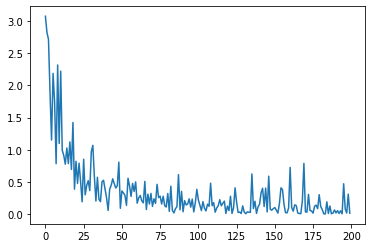

In [136]:
plt.plot(mlp_hist)
plt.show()

In [137]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        ytest = (data[:,0]-1).long()
        Xtest = data[:,1:]
        Xtest, ytest = Xtest.cuda(), ytest.cuda()
        
        y_test_pred = model(Xtest)

        for idx, i in enumerate(y_test_pred):
            #print(i)
            #print(idx)
            #print(torch.argmax(i))
            if torch.argmax(i) == ytest[idx]:
                correct += 1
            total += 1
        #break
    
#print(ytest)    
print("Accuracy: ", round(correct/total, 3))
    
    

Accuracy:  0.697


In [176]:
torch.save(model.state_dict(), './mlp_three_model.tar')

Full model accuracy = 69.7%  
3 Gesture model accuracy = 64.9% 

## LSTM

In [110]:
import torch

class Lstm(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size, output_size=24, num_layers=2):
        super(Lstm, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.output_size = output_size
        self.hidden = self.init_hidden()
        self.lstm = torch.nn.LSTM(self.input_size, self.hidden_size, self.num_layers)
        self.lstm2 = torch.nn.LSTM(self.hidden_size, self.hidden_size,self.num_layers)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.linear = torch.nn.Linear(self.hidden_size, 24)
        self.relu1 = torch.nn.ReLU()

        
    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size).cuda(),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_size).cuda())
        
    def forward(self, x):
        h0 = self.init_hidden()
        #print(x.size())
        x = x.unsqueeze(dim=0)
        #print(x.size())
        lstm, self.hidden = self.lstm(x, self.hidden)
        #lstm, self.hidden = self.lstm2(lstm, self.hidden)
        #lstm = self.linear2(lstm)
        #lstm = self.relu1(lstm)
        pred = self.linear(lstm)
        pred = pred.squeeze()
        return pred

In [111]:
#lstm_model = LSTM(input_size, hidden_size, batch_size, output_dim, num_layers)
lstm_model = Lstm(3108, 64, 32, 24, 2)
lstm_model = lstm_model.cuda()

In [112]:
#loss_fn = torch.nn.functional.nll_loss()
lr = 0.01
num_epochs = 500
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(lstm_model.parameters(), lr=lr)

print(len(trainset))

hist = np.zeros(num_epochs)
lstm_model.train()
for t in range(num_epochs):
    for data in trainset:
        y = data[:,0]-1
        X = data[:,1:]
        
        if X.size() != torch.Size([32,3108]):
            continue
        
        y, X =  y.cuda(), X.cuda()
        lstm_model.zero_grad()
        optimiser.zero_grad()
        lstm_model.hidden = lstm_model.init_hidden()
        #y_pred = torch.max(y_pred,1).indices.size()
        y_pred = lstm_model(X.float())
        #print(y_pred.size())
        #print(torch.max(y_pred, 1).indices.size())
        #print(y.size())
        
        
        loss = criterion(y_pred, y.long())
        #loss= torch.nn.functional.nll_loss(y_pred, y.long())

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print("Epoch ", t, " NLL: ", loss.item())
    hist[t] = loss.item()
print('done')
    

270
Epoch  0  NLL:  3.10315203666687
Epoch  1  NLL:  3.046898365020752
Epoch  2  NLL:  3.030071973800659
Epoch  3  NLL:  3.1048834323883057
Epoch  4  NLL:  3.0735862255096436
Epoch  5  NLL:  3.075759172439575
Epoch  6  NLL:  2.962616443634033
Epoch  7  NLL:  2.9120144844055176
Epoch  8  NLL:  2.891908645629883
Epoch  9  NLL:  3.0814340114593506
Epoch  10  NLL:  2.8436551094055176
Epoch  11  NLL:  3.1365482807159424
Epoch  12  NLL:  3.1529955863952637
Epoch  13  NLL:  2.920203685760498
Epoch  14  NLL:  2.9524595737457275
Epoch  15  NLL:  2.7908077239990234
Epoch  16  NLL:  3.0010952949523926
Epoch  17  NLL:  3.009446382522583
Epoch  18  NLL:  2.901385545730591
Epoch  19  NLL:  3.0213918685913086
Epoch  20  NLL:  2.8772828578948975
Epoch  21  NLL:  2.9917917251586914
Epoch  22  NLL:  2.9452333450317383
Epoch  23  NLL:  3.005847454071045
Epoch  24  NLL:  2.832209348678589
Epoch  25  NLL:  3.1231672763824463
Epoch  26  NLL:  2.935305595397949
Epoch  27  NLL:  2.8771815299987793
Epoch  28  

In [423]:
correct = 0
total = 0
lstm_model.eval()
with torch.no_grad():
    for data in testset:
        ytest = (data[:,0]-1)
        Xtest = data[:,1:]
        Xtest, ytest = Xtest.cuda(), ytest.cuda()
        if Xtest.size() != torch.Size([32,3108]):
            continue
            
        y_test_pred = lstm_model(Xtest.float())
        
        for idx, i in enumerate(y_test_pred):

        
            if torch.argmax(i) == ytest[idx]:
                correct += 1
            total += 1
        
    
#print(ytest)    
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.24


In [151]:
print(X.size())
print(y.size())

print(ytest.size())
print(Xtest.size())

torch.Size([9, 3108])
torch.Size([9])
torch.Size([10])
torch.Size([10, 3108])


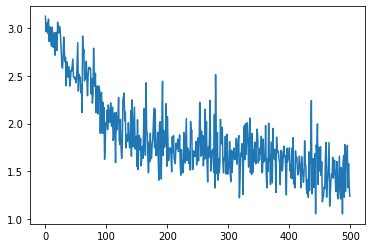

In [424]:
plt.plot(hist)
plt.show()